In [52]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [53]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data=pd.read_csv('diabetes.csv')


In [54]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
array=data.values

In [56]:
print(array)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [57]:
X=array[:,0:8]
y=array[:,8]


In [58]:
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings('ignore')

LR: 0.777290 (0.059894)
KNN: 0.699214 (0.052742)
CART: 0.706972 (0.084759)
XGB: 0.740858 (0.049336)
SVC: 0.757775 (0.051909)


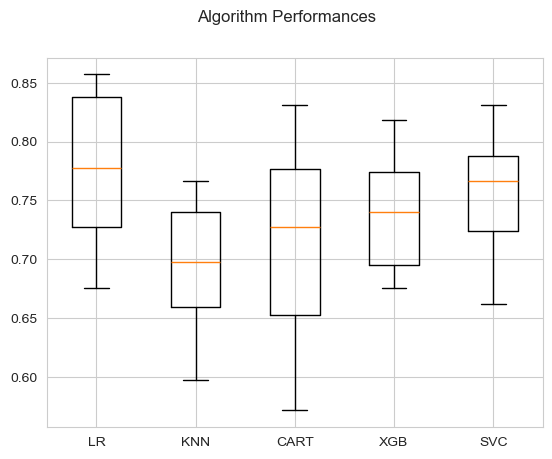

In [59]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('SVC',SVC()))
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42,shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    print(msg)
fig=pyplot.figure()
fig.suptitle('Algorithm Performances')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
